In [1]:
from SeversonDataset_preprocess import mat_to_npy 

mat_to_npy(mode='rdp') # load mat files and delete some samples with anomalies

skip err cell: batch 1, cell_id 0
skip err cell: batch 1, cell_id 1
skip err cell: batch 1, cell_id 2
skip err cell: batch 1, cell_id 3
skip err cell: batch 1, cell_id 4
skip err cell: batch 1, cell_id 5
(1, 270)
(1, 270)
(1, 270)
(1, 270)
(1, 385)
(1, 385)
(1, 385)
(1, 385)
(4, 270)
(4, 385)
(1, 4, 655)
(1, 270)
(1, 270)
(1, 270)
(1, 270)
(1, 388)
(1, 388)
(1, 388)
(1, 388)
(4, 270)
(4, 388)
(1, 4, 658)
(1, 276)
(1, 276)
(1, 276)
(1, 276)
(1, 385)
(1, 385)
(1, 385)
(1, 385)
(4, 276)
(4, 385)
(1, 4, 661)
(1, 277)
(1, 277)
(1, 277)
(1, 277)
(1, 396)
(1, 396)
(1, 396)
(1, 396)
(4, 277)
(4, 396)
(1, 4, 673)
(1, 273)
(1, 273)
(1, 273)
(1, 273)
(1, 377)
(1, 377)
(1, 377)
(1, 377)
(4, 273)
(4, 377)
(1, 4, 650)
(1, 255)
(1, 255)
(1, 255)
(1, 255)
(1, 395)
(1, 395)
(1, 395)
(1, 395)
(4, 255)
(4, 395)
(1, 4, 650)
(1, 268)
(1, 268)
(1, 268)
(1, 268)
(1, 388)
(1, 388)
(1, 388)
(1, 388)
(4, 268)
(4, 388)
(1, 4, 656)
(1, 259)
(1, 259)
(1, 259)
(1, 259)
(1, 400)
(1, 400)
(1, 400)
(1, 400)
(4, 259)
(

ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 2, the array at index 0 has size 655 and the array at index 1 has size 658

n cells: 114
min EOL: 326, max EOL: 1934


ValueError: Unable to determine Axes to steal space for Colorbar. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.

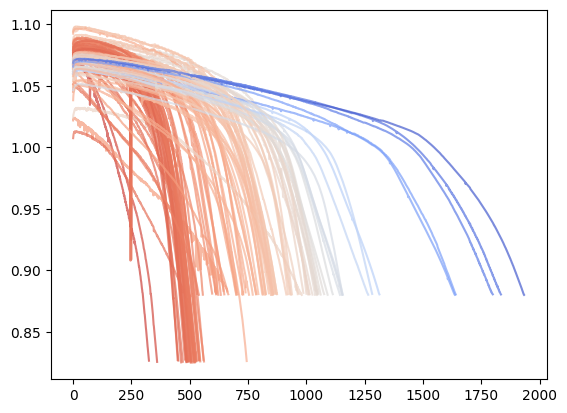

In [2]:
%matplotlib inline
from SeversonDataset_preprocess import data_visualization

data_visualization(f_id =1) # capacity fade curve for all cells

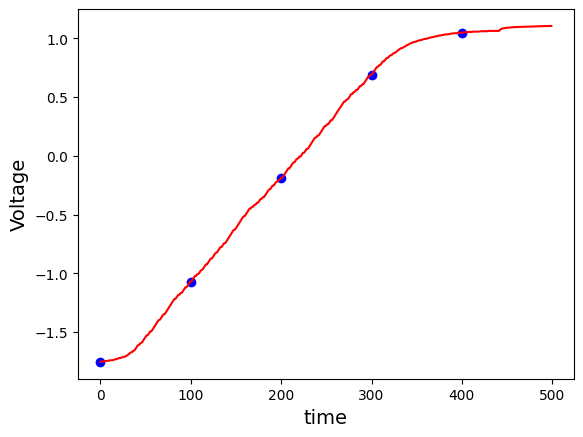

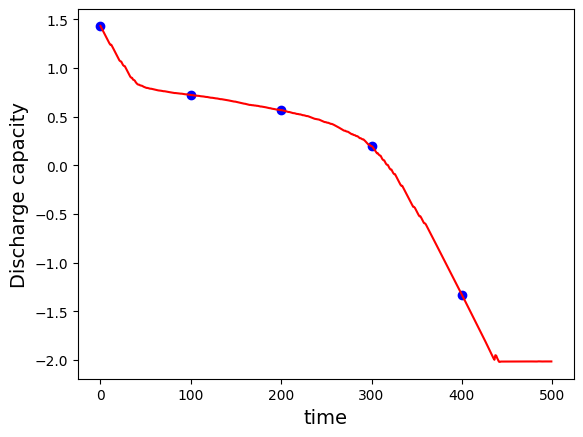

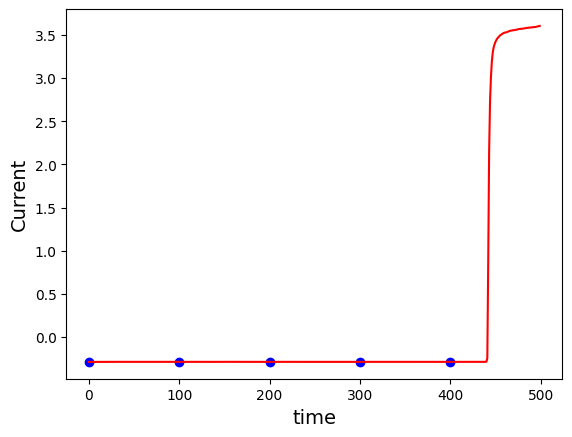

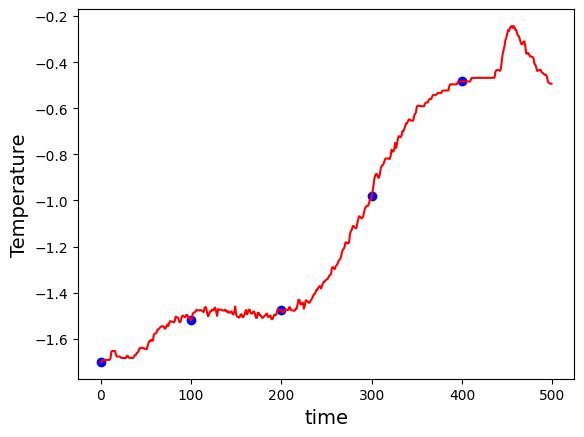

In [3]:
%matplotlib inline
from SeversonDataset_preprocess import train_val_split
from data_preprocessing import Feature_Selector_Dataset

# training:testing = 8:2
train_val_split(seed=41) 

# load dataset for pytorch
feature_selector_set = Feature_Selector_Dataset(train=True, pred_target='quality', part='discharge', norm=False)
feature_selector_set.visualize(120, 0)
feature_selector_set.visualize(120, 1)
feature_selector_set.visualize(120, 2)
feature_selector_set.visualize(120, 3)

In [4]:
from data_preprocessing import load_Severson
trn_feature, trn_target = load_Severson(training=True, norm=False, part='discharge')

In [5]:
print(trn_feature.shape)
print(trn_target.shape)

(4550, 4, 500)
(4550, 3)


In [6]:

# Reshape the training data from (4550, 4, 500) to (91, 100000)
# 4550 = 91 batteries * 50 cycles, reshaping cycles and features
num_batteries = 91
num_features = trn_feature.shape[1]
data_per_cycle = trn_feature.shape[2]
training_data_reshaped = trn_feature.reshape(num_batteries, -1)  # (91, 100000)

# Extract the last target ([:,2]) and reshape into (91, 1)
# Ensure only one target per battery by taking the first target for each set of 50 cycles
training_target_reshaped = trn_target[::50, 2].reshape(num_batteries, -1)  # (91, 1)

In [7]:
print(training_data_reshaped.shape)
print(training_target_reshaped.shape)

(91, 100000)
(91, 1)
